In [1]:
import random
import math
import matplotlib.pyplot as plt

data = open("./Datasets/normal/normal.txt", "r").readlines()
coordinates = []
for line in data:
    coordinates.append([float(i) for i in line.split()])

In [2]:
n = len(coordinates)
dimensions = 2


def distance(a, b):
    dist = 0
    for i in range(dimensions):
        dist += (a[i]-b[i])**2
    dist = math.sqrt(dist)
    return dist


def closest_centroid_index(centroids, point):
    mini = 1e9
    pos = -1
    for i in range(len(centroids)):
        d = distance(centroids[i], point)
        if pos == -1 or d < mini:
            mini = d
            pos = i
    return pos


def new_centroids(assignment, k):
    centroids = []
    for _ in range(k):
        centroids.append([0]*dimensions)
    cnts = [0]*k
    for i in range(n):
        cnts[assignment[i]] += 1
        for j in range(dimensions):
            centroids[assignment[i]][j] += coordinates[i][j]
    for i in range(k):
        if cnts[i] == 0:
            centroids[i] = coordinates[random.randint(0, n-1)]
            continue
        for j in range(dimensions):
            centroids[i][j] /= cnts[i]
    return centroids


def init(k):
    pos = random.randint(0, n-1)
    centroids = [coordinates[pos]]
    used = [pos]

    for _ in range(k-1):
        possible_positions = []
        weights = []
        for i in range(n):
            if (i in used) == False:
                pos = 0
                for j in range(1, len(centroids)):
                    if distance(coordinates[i], centroids[pos]) > distance(coordinates[i], centroids[j]):
                        pos = j
                possible_positions.append(i)
                weights.append(distance(coordinates[i], centroids[pos])**2)
        pos = random.choices(possible_positions, weights=weights, k=1)[0]
        centroids.append(coordinates[pos])
        used.append(pos)

    return centroids


def k_means(k):
    # centroids = []
    # # centroids = random.sample(coordinates, k)
    # range_x = [coordinates[0][0]]*2
    # range_y = [coordinates[0][1]]*2
    # for i in coordinates:
    #     range_x[0] = min(range_x[0], i[0])
    #     range_x[1] = max(range_x[1], i[0])
    #     range_y[0] = min(range_y[0], i[1])
    #     range_y[1] = max(range_y[1], i[1])
    # for i in range(k):
    #     centroids.append([random.uniform(range_x[0], range_x[1]),
    #                      random.uniform(range_y[0], range_y[1])])
    #     # centroids.append([range_x[0]+i/k*(range_x[1]-range_x[0]),range_y[0]+i/k*(range_y[1]-range_y[0])])

    centroids = init(k)

    assignment = [-1]*n
    cnt = 0
    while True:
        cnt += 1
        f = False
        for i in range(n):
            new_pos = closest_centroid_index(centroids, coordinates[i])
            if new_pos != assignment[i]:
                f = True
            assignment[i] = new_pos
        if f == False:
            break
        centroids = new_centroids(assignment, k)
    # print(cnt)
    return assignment, centroids

In [3]:
def within_cluster_distance(assignment, centroids):
    cost = 0
    for i in range(n):
        cost += distance(coordinates[i], centroids[assignment[i]])
    return cost


def between_cluster_distance(assignment, k):
    distances = [[]]*k
    for i in range(k):
        distances[i] = [0]*k
    for i in range(n):
        for j in range(i+1, n):
            distances[assignment[i]][assignment[j]] = max(
                distances[assignment[i]][assignment[j]], distance(coordinates[i], coordinates[j]))
    total = 0
    for i in range(k):
        for j in range(i+1, k):
            total += distances[i][j]
    return total/k


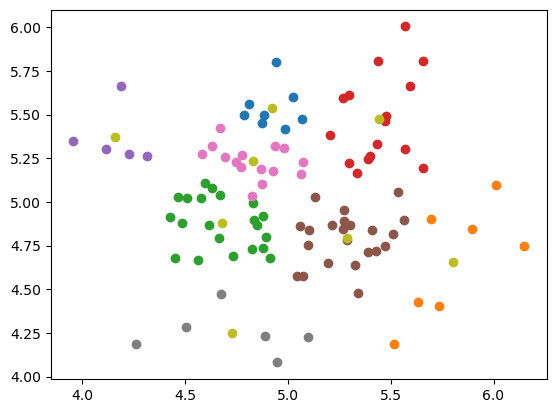

In [4]:
best = []
mini = -1
k = 8
for _ in range(10):
    assignment, centroids = k_means(k)
    cur = within_cluster_distance(assignment, centroids)
    # cur = between_cluster_distance(assignment, k)
    if mini == -1 or cur < mini:
        mini = cur
        best = [assignment, centroids]

assignment = best[0]
centroids = best[1]
x = []
y = []
for i in range(k):
    x.append([])
    y.append([])
for i in range(n):
    x[assignment[i]].append(coordinates[i][0])
    y[assignment[i]].append(coordinates[i][1])

for i in range(k):
    plt.scatter(x[i], y[i])
x = []
y = []
for i in centroids:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x, y)
plt.show()

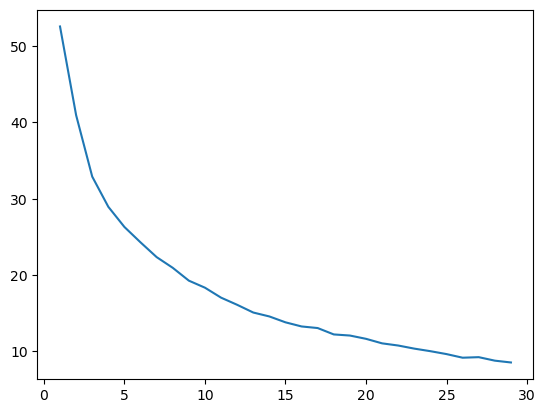

In [5]:
x = []
y = []
for k in range(1, 30):
    mini = -1
    for _ in range(10):
        assignment, centroids = k_means(k)
        cur = within_cluster_distance(assignment, centroids)
        if mini == -1 or mini > cur:
            mini = cur
    x.append(k)
    y.append(mini)

plt.plot(x, y)
plt.show()